In [1]:
from fipy import CellVariable, Variable, Grid1D, DiffusionTerm, TransientTerm, ImplicitSourceTerm, DummySolver, Viewer
from fipy.tools import numerix
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nx = 400
dx = 5e-6 # cm
L = nx * dx


In [3]:
mesh = Grid1D(dx = dx, nx = nx)

In [4]:
phase = CellVariable(name="phase",
                      mesh=mesh,
                      hasOld=1)
x = mesh.cellCenters[0]
phase.setValue(1.)
phase.setValue(0., where=x > L/2)

In [5]:
Lv = 2350 # J / cm**3
Tm = 1728. # K
T = Variable(value=Tm)
enthalpy = Lv * (T - Tm) / Tm # J / cm**3

In [6]:
delta = 1.5 * dx
sigma = 3.7e-5 # J / cm**2
beta = 0.33 # cm / (K s)
kappa = 6 * sigma * delta # J / cm
W = 6 * sigma / delta # J / cm**3
Mphi = Tm * beta / (6. * Lv * delta) # cm**3 / (J s)

In [7]:
displacement = L * 0.1

In [8]:
mPhi = -((1 - 2 * phase) * W + 30 * phase * (1 - phase) * enthalpy)
dmPhidPhi = 2 * W - 30 * (1 - 2 * phase) * enthalpy
S1 = dmPhidPhi * phase * (1 - phase) + mPhi * (1 - 2 * phase)
S0 = mPhi * phase * (1 - phase) - S1 * phase
eq = TransientTerm(coeff=1/Mphi) == DiffusionTerm(coeff=kappa) \
                         + S0 + ImplicitSourceTerm(coeff = S1)

In [9]:
T.setValue(T() - 1)

In [10]:
velocity = beta * abs(Tm - T()) # cm / s
timeStep = .1 * dx / velocity # s
elapsed = 0
traj = [np.array(phase),]
while elapsed < displacement / velocity:
    phase.updateOld()
    res = 1e+10
    while res > 1e-5:
        res = eq.sweep(var=phase, dt=timeStep)
    elapsed += timeStep
    traj.append(np.array(phase))
    

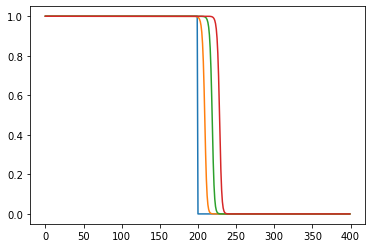

In [11]:
plt.plot(traj[0])
plt.plot(traj[100])
plt.plot(traj[200])
plt.plot(traj[300])